In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# K-Nearest Neighbors (kNN)

$k$-Nearest neighbors is one of the simplest predictive models there is. 
The only things it requires are:
   1. Some notion of distance.
   2. An assumption that points that are close to one another are similar.

Let's say we've picked a number  $𝑘$  (like 3 or 5). Then, when we want to classify some new data point, we find the  𝑘  nearest labeled points and let them vote on the new ouput.

**Contents**

- [knn implementation](#1.knn-implementation)
- [Example: the MNIST dataset](#2.-Example:-the-MNIST-dataset)
- [Choosing k](#3.-Choosing-k)

## 1. knn implementation

In [2]:
def knn_classifier_slow(X,y,X_new,k):
    'one-loop version'
    
    m,_ = X.shape
    m_new,_ = X_new.shape
    
    # number of classes
    n_classes = len(np.unique(y))
    
    # initialize y_pred vector
    y_pred = np.zeros(m_new)

    for i in range(m_new):
        # distances
        dist = np.linalg.norm(X-X_new[i], axis=1)
        # k nearest kneighbors
        knn = np.argsort(dist)[0:k] 
        # labels
        nearest_labels = y[knn]
        # majority vote; break ties by choosing the smaller label.                          
        y_pred[i] = np.argmax(np.bincount(nearest_labels, minlength=n_classes))
    return y_pred

In [13]:
def knn_classifier(X,y,X_new,k):
    'no-loop version'
    
    m,_ = X.shape
    m_new,_ = X_new.shape
    
    # number of classes
    n_classes = len(np.unique(y))
    
    # distance matrix
    #np.sqrt(np.sum((X_new[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1))
    dist = np.sqrt(np.square(X_new).sum(1).reshape([-1,1])+np.square(X).sum(1).reshape([1,-1])-2*X_new.dot(X.T))
    
    # k nearest neighbor
    knn = np.argsort(dist,axis=1)[:,0:k]
    
    # labels
    nearest_labels = y[knn]
    # prediction
    y_pred = np.argmax(np.apply_along_axis(np.bincount, 1,nearest_labels, minlength=n_classes),axis=1)
    
    return y_pred

In [42]:
def knn_classifier_mod(X,y,X_new,k, weights='uniform'):
    'no-loop version'
    
    m,_ = X.shape
    m_new,_ = X_new.shape
    
    # number of classes
    n_classes = len(np.unique(y))
    
    
    
    # distance matrix
    dist = np.sqrt(np.square(X_new).sum(axis=1).reshape([m_new,1])+np.square(X).sum(axis=1).reshape([1,m])-2*X_new.dot(X.T))
    
    # k nearest neighbor
    knn = np.argsort(dist,axis=1)[:,0:k]
    
    y_pred = np.zeros(m_new)
    for i in range(m_new):
        # labels
        nearest_labels = y[knn[i]]
        # weights
        if weights=='uniform':
            w = np.ones(k)
        elif weights=='distance':
            w=1/dist[i,knn[i]]
        # prediction
        y_pred[i] = np.argmax(np.bincount(nearest_labels, minlength=n_classes, weights=w))
    
    return y_pred

## 2. Example: the MNIST dataset

In [6]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/digits.csv'
data = pd.read_csv(url)
data.head(5) # display first 5 rows of the dataset

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [7]:
X = data.iloc[:,0:784].to_numpy() # pixels
y = data['label'].to_numpy() # labels

In [8]:
len(np.unique(y))

10

In [9]:
X_train,y_train = X[:3000],y[:3000]
X_val,y_val = X[3000:4000],y[3000:4000]
X_test,y_test = X[4000:],y[4000:]

In [10]:
%%time
y_test_pred = knn_classifier_slow(X_train,y_train,X_test,k=10)

Wall time: 52.3 s


In [17]:
%%timeit
y_rest_pred = knn_classifier(X_train,y_train,X_test,k=10)

692 ms ± 15.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [31]:
%%timeit
y_rest_pred = knn_classifier_mod(X_train,y_train,X_test,k=10)

708 ms ± 8.63 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
%%timeit
y_rest_pred = knn_classifier_mod(X_train,y_train,X_test,k=10, weights='distance')

682 ms ± 34.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
y_rest_pred = knn_classifier_mod(X_train,y_train,X_test,k=10,weights='uniform')

In [41]:
'confusion matrix'
C = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        C[i,j] = sum(y_test_pred[y_test==i]==j)
C

array([[ 98.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.],
       [  0., 117.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.],
       [  0.,   7.,  73.,   2.,   2.,   0.,   2.,   4.,   1.,   0.],
       [  0.,   1.,   3.,  90.,   0.,   2.,   0.,   2.,   0.,   3.],
       [  0.,   1.,   0.,   0.,  97.,   0.,   1.,   0.,   0.,   6.],
       [  1.,   1.,   0.,   1.,   2.,  72.,   4.,   0.,   0.,   3.],
       [  1.,   1.,   0.,   0.,   0.,   0.,  94.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   2.,   0.,   0., 112.,   0.,   3.],
       [  1.,   4.,   3.,   1.,   3.,   1.,   2.,   1.,  70.,   3.],
       [  1.,   0.,   0.,   1.,   3.,   0.,   0.,   4.,   0.,  89.]])

In [43]:
y_rest_pred = knn_classifier_mod(X_train,y_train,X_test,k=10,weights='distance')

In [44]:
'confusion matrix'
C = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        C[i,j] = sum(y_test_pred[y_test==i]==j)
C

array([[ 98.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.],
       [  0., 117.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.],
       [  0.,   7.,  73.,   2.,   2.,   0.,   2.,   4.,   1.,   0.],
       [  0.,   1.,   3.,  90.,   0.,   2.,   0.,   2.,   0.,   3.],
       [  0.,   1.,   0.,   0.,  97.,   0.,   1.,   0.,   0.,   6.],
       [  1.,   1.,   0.,   1.,   2.,  72.,   4.,   0.,   0.,   3.],
       [  1.,   1.,   0.,   0.,   0.,   0.,  94.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   2.,   0.,   0., 112.,   0.,   3.],
       [  1.,   4.,   3.,   1.,   3.,   1.,   2.,   1.,  70.,   3.],
       [  1.,   0.,   0.,   1.,   3.,   0.,   0.,   4.,   0.,  89.]])

In [45]:
'percentage of incorrect classifications'
num_incorrect = sum(y_test != y_test_pred)
100*num_incorrect/len(y_val)

8.8

## 3. Choosing k

In [34]:
'classify the validation set using different values for k'
k_max = 20
pct_incorrect = np.zeros(k_max)
k_list = np.arange(1,k_max+1) 
for i in range(k_max):
    k = k_list[i]
    'classify validation digits'
    y_val_pred =knn_classifier(X_train,y_train,X_val,k)
    
        
    'percentage of incorrect classifications'
    num_incorrect = sum(y_val != y_val_pred)
    pct_incorrect[i] = 100*num_incorrect/len(y_val)


Text(0.5, 1.0, 'Percentage of incorrect classifications')

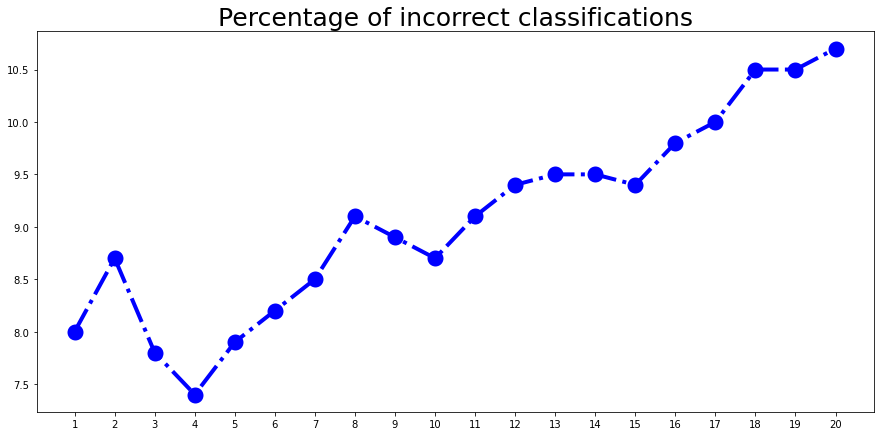

In [35]:
plt.figure(figsize=(15,7))
plt.plot(k_list, pct_incorrect,'bo-.',markeredgewidth=10,linewidth=4)
plt.xticks(k_list)
plt.title('Percentage of incorrect classifications',fontsize=25)